# Importing required libraries.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree
# sales_data = pd.read_csv("df_final.csv")

Files
* train.csv - historical data including Sales
* test.csv - historical data excluding Sales
* store.csv - supplemental information about the stores

We will combine 2 files train.csv and and store.csv under unique Id for each store

In [83]:
# Đọc dữ liệu từ file train.csv
train_data = pd.read_csv('../data/orginal_data/train.csv', low_memory=False)

# Đọc dữ liệu từ file store.csv
store_data = pd.read_csv('../data/orginal_data/store.csv', low_memory=False)

# Gộp hai DataFrame theo cột 'store'
merged_data = pd.merge(train_data, store_data, on='Store')

# # Lưu dữ liệu đã gộp vào một tệp tin mới
# merged_data.to_csv('../data/orginal_data/merged_data.csv', index=False)

In [84]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [85]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

Split add a new column named DayOfWeekName from the column DayOfWeek in DataFrame merged_data

In [86]:
# Tạo một từ điển ánh xạ giữa giá trị DayOfWeek và tên ngày tương ứng
day_of_week_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# Tạo cột mới DayOfWeekName bằng cách ánh xạ giá trị từ cột DayOfWeek
merged_data['DayOfWeekName'] = merged_data['DayOfWeek'].map(day_of_week_map)


Split one more column from merged_data column MonthName from column Date

In [87]:
# Tạo một cột mới MonthName từ cột Date
merged_data['MonthName'] = pd.to_datetime(merged_data['Date']).dt.strftime('%b')

In [88]:
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName,MonthName
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN,Friday,Jul
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN,Thursday,Jul
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN,Wednesday,Jul
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN,Tuesday,Jul
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN,Monday,Jul


In [89]:
# Thiết lập tùy chọn hiển thị để giá trị là số thực
pd.set_option('display.float_format', '{:.2f}'.format)
merged_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1014567.00,693861.00,693861.00,1017209.00,509178.00,509178.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18,5430.09,7.22,2008.69,0.50,23.27,2011.75
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38,7715.32,3.21,5.99,0.50,14.10,1.66
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,710.00,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,2330.00,8.00,2010.00,1.00,22.00,2012.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,6890.00,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [90]:
# Sắp xếp DataFrame theo cột Date
sorted_merged_data = merged_data.sort_values('Date')
# Sắp xếp DataFrame theo cột id theo thứ tự giảm dần
sorted_merged_data = sorted_merged_data.sort_values('Store', ascending=False)
sorted_merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName,MonthName
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.00,NaN,NaN,1,22.00,2012.00,"Mar,Jun,Sept,Dec",Tuesday,Jan
1016801,1115,3,2014-02-12,3982,319,1,0,0,0,d,c,5350.00,NaN,NaN,1,22.00,2012.00,"Mar,Jun,Sept,Dec",Wednesday,Feb
1016979,1115,7,2013-08-18,0,0,0,0,0,0,d,c,5350.00,NaN,NaN,1,22.00,2012.00,"Mar,Jun,Sept,Dec",Sunday,Aug
1016479,1115,3,2014-12-31,3847,290,1,0,0,1,d,c,5350.00,NaN,NaN,1,22.00,2012.00,"Mar,Jun,Sept,Dec",Wednesday,Dec
1016745,1115,3,2014-04-09,4531,322,1,0,0,0,d,c,5350.00,NaN,NaN,1,22.00,2012.00,"Mar,Jun,Sept,Dec",Wednesday,Apr


In [91]:
sorted_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1017208 to 0
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionOpenSi

# Cleaning dataset.

In [92]:
sales_data = sorted_merged_data

In [93]:
sales_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeekName                     0
MonthName                         0
dtype: int64

In [20]:
cat_col = []
for x in sales_data.dtypes.index:
  if sales_data.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Date',
 'StateHoliday',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'DayOfWeekName']

In [21]:
cat_col.remove('DayOfWeekName')
cat_col.remove('Date')
cat_col

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [22]:
for col in cat_col:
  print(col)
  print(sales_data[col].value_counts())
  print()

StateHoliday
StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

StoreType
StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

Assortment
Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

PromoInterval
PromoInterval
Jan,Apr,Jul,Oct     585023
Feb,May,Aug,Nov     246340
Mar,Jun,Sept,Dec    185846
Name: count, dtype: int64



# Filling null values


In [23]:
sales_data['CompetitionOpenSinceMonth'] = sales_data['CompetitionOpenSinceMonth'].fillna(method='ffill').fillna(method='bfill')
sales_data['CompetitionOpenSinceYear'] = sales_data['CompetitionOpenSinceYear'].fillna(method='ffill').fillna(method='bfill')
sales_data['CompetitionDistance'] = sales_data['CompetitionDistance'].fillna(method='ffill').fillna(method='bfill')
sales_data['Promo2SinceWeek'] = sales_data['Promo2SinceWeek'].fillna(method='ffill').fillna(method='bfill')
sales_data['Promo2SinceYear'] = sales_data['Promo2SinceYear'].fillna(method='ffill').fillna(method='bfill')
sales_data['PromoInterval'] = sales_data['PromoInterval'].fillna(method='ffill').fillna(method='bfill')
sales_data.isnull().sum()
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName,MonthName
0,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Tuesday,6
1,1115,3,2014-02-12,3982,319,1,0,0,0,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Wednesday,5
2,1115,7,2013-08-18,0,0,0,0,0,0,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Sunday,1
3,1115,3,2014-12-31,3847,290,1,0,0,1,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Wednesday,4
4,1115,3,2014-04-09,4531,322,1,0,0,0,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",Wednesday,0


In [24]:
sales_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeekName                0
MonthName                    0
dtype: int64

In [ ]:
# Lưu dữ liệu đã gộp vào một tệp tin mới
sales_data.to_csv('../data/df_final.csv', index=False)

In [6]:
import pandas as pd
sales_data = pd.read_csv('../data/df_final.csv', low_memory=False)

# Transforming categorical data.

In [25]:
le = LabelEncoder()
sales_data['MonthName'] = le.fit_transform(sales_data['MonthName'].astype(str))
for col in cat_col:
    sales_data[col] = le.fit_transform(sales_data[col].astype(str))
sales_data['DayOfWeekName'] = le.fit_transform(sales_data['DayOfWeekName'].astype(str))

In [26]:
# Lưu dữ liệu đã gộp vào một tệp tin mới
sales_data.to_csv('../data/df_final.csv', index=False)

In [27]:
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeekName,MonthName
0,1115,2,2013-01-01,0,0,0,0,1,1,3,2,5350.0,4.0,2006.0,1,22.0,2012.0,2,5,8
1,1115,3,2014-02-12,3982,319,1,0,0,0,3,2,5350.0,4.0,2006.0,1,22.0,2012.0,2,6,7
2,1115,7,2013-08-18,0,0,0,0,0,0,3,2,5350.0,4.0,2006.0,1,22.0,2012.0,2,3,1
3,1115,3,2014-12-31,3847,290,1,0,0,1,3,2,5350.0,4.0,2006.0,1,22.0,2012.0,2,6,6
4,1115,3,2014-04-09,4531,322,1,0,0,0,3,2,5350.0,4.0,2006.0,1,22.0,2012.0,2,6,0


# Splitting into train and test dataset form training.

In [134]:
X = sales_data.drop(columns=['Store','Date','Sales', 'Promo2', 'Open', 'CompetitionOpenSinceYear','DayOfWeekName' ,'Promo2SinceYear'])
y = sales_data['Sales']

In [135]:
X.head(2)

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2SinceWeek,PromoInterval,MonthName
0,2,0,0,1,1,3,2,5350.0,4.0,22.0,2,8
1,3,319,0,0,0,3,2,5350.0,4.0,22.0,2,7


In [137]:
y.head()

0       0
1    3982
2       0
3    3847
4    4531
Name: Sales, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#Further divide training dataset into train and validation dataset with an 90:10 split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,test_size=0.1,random_state=2018)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,X_val.shape, Y_val.shape)
c=0
for i in Y_test:
  if i==0:
    c=c+1
c


(823939, 12) (101721, 12) (823939,) (101721,) (91549, 12) (91549,)


17187

In [159]:
X_train

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2SinceWeek,PromoInterval,MonthName
563263,1,923,1,0,1,0,0,990.0,9.0,40.0,1,5
491322,3,797,1,0,0,0,2,2270.0,4.0,35.0,2,6
679436,5,532,1,0,0,3,2,1970.0,7.0,45.0,0,9
128952,3,678,1,0,1,0,2,9630.0,9.0,14.0,1,4
191221,1,601,0,0,1,0,2,250.0,7.0,37.0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
32116,4,814,1,0,0,0,0,2410.0,3.0,40.0,1,10
870220,1,486,0,0,0,3,2,5340.0,3.0,13.0,1,11
820653,1,716,1,0,1,2,0,3150.0,2.0,9.0,2,1
18471,6,552,0,0,0,0,0,690.0,6.0,14.0,1,2


In [33]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=10)
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.9901259423512857

In [34]:
#calculate the average score of the train dataset
mean_sales = Y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : 5773.435011709602


In [56]:
# Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(Y_test - mean_sales).mean())

MAE for Test Data: 2878.3486821370952


In [79]:
prediction_data = pd.DataFrame([[3,	319	,0	,0,	0,	3	,2	,5350.00	,4.00,	22.00,	2	,5]],
                               columns=X_train.columns)
predictions = model.predict(prediction_data)
predictions = np.around(predictions)
predictions

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 29ms/step


array([[3898.]], dtype=float32)

# Saving the model.

In [133]:
import pickle
filename = 'sales_prediction.sav'
pickle.dump(model, open(filename, 'wb'))

# Deep Neural Network Architecture

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Create Deep Neural Network Architecture

In [58]:
model = Sequential()
model.add(Dense(150,input_dim = 12,activation="relu"))
#The input_dim = 12, since the width of the training data= 12 (refer data engg section)
model.add(Dense(1,activation = "linear"))

In [59]:
#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [61]:
#Train the model
model.fit(X_train.values,Y_train.values, validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
14305/14305 [==============================] - 34s 2ms/step - loss: 941.6269 - mean_absolute_error: 941.6269 - val_loss: 874.3391 - val_mean_absolute_error: 874.3391
Epoch 2/10
14305/14305 [==============================] - 30s 2ms/step - loss: 841.6354 - mean_absolute_error: 841.6354 - val_loss: 829.1855 - val_mean_absolute_error: 829.1855
Epoch 3/10
14305/14305 [==============================] - 37s 3ms/step - loss: 818.9661 - mean_absolute_error: 818.9661 - val_loss: 804.3301 - val_mean_absolute_error: 804.3301
Epoch 4/10
14305/14305 [==============================] - 35s 2ms/step - loss: 809.6284 - mean_absolute_error: 809.6284 - val_loss: 805.9605 - val_mean_absolute_error: 805.9605
Epoch 5/10
14305/14305 [==============================] - 32s 2ms/step - loss: 801.3658 - mean_absolute_error: 801.3658 - val_loss: 796.7094 - val_mean_absolute_error: 796.7094
Epoch 6/10
14305/14305 [==============================] - 29s 2ms/step - loss: 791.1501 - mean_absolute_error: 791.

## Testing the Model Performance

In [62]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(X_test.values,Y_test.values)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

3179/3179 [==============================] - 5s 1ms/step - loss: 765.6896 - mean_absolute_error: 765.6896
Metric  loss : 765.69
Metric  mean_absolute_error : 765.69


In [63]:
model = Sequential()
model.add(Dense(150,input_dim = 12,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(X_train,Y_train, validation_data=(X_test,
Y_test),epochs=10,batch_size=64)
#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
14305/14305 [==============================] - 50s 3ms/step - loss: 1911825.2500 - mean_absolute_error: 884.5128 - val_loss: 1508523.7500 - val_mean_absolute_error: 794.2173
Epoch 2/10
14305/14305 [==============================] - 56s 4ms/step - loss: 1524399.6250 - mean_absolute_error: 800.7311 - val_loss: 1451463.6250 - val_mean_absolute_error: 775.6642
Epoch 3/10
14305/14305 [==============================] - 53s 4ms/step - loss: 1421564.3750 - mean_absolute_error: 776.6219 - val_loss: 1328931.3750 - val_mean_absolute_error: 757.6691
Epoch 4/10
14305/14305 [==============================] - 51s 4ms/step - loss: 1357906.6250 - mean_absolute_error: 760.8642 - val_loss: 1289601.0000 - val_mean_absolute_error: 743.9393
Epoch 5/10
14305/14305 [==============================] - 47s 3ms/step - loss: 1286185.6250 - mean_absolute_error: 742.8030 - val_loss: 1204431.7500 - val_mean_absolute_error: 731.1207
Epoch 6/10
14305/14305 [==============================] - 40s 3ms/step - lo

In [64]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(X_test.values,Y_test.values)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

3179/3179 [==============================] - 5s 2ms/step - loss: 1687479.5000 - mean_absolute_error: 820.6736
Metric  loss : 1687479.5
Metric  mean_absolute_error : 820.67


In [154]:

model = Sequential()
model.add(Dense(150,input_dim = 12,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(X_train,Y_train, validation_data=(X_val,Y_val),
epochs=15,batch_size=64, callbacks=[history])
result = model.evaluate(X_test, Y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
12875/12875 [==============================] - 70s 5ms/step - loss: 1966754.0000 - mean_absolute_error: 899.6340 - val_loss: 1702972.5000 - val_mean_absolute_error: 862.9311
Epoch 2/15
12875/12875 [==============================] - 72s 6ms/step - loss: 1554909.6250 - mean_absolute_error: 807.5944 - val_loss: 1396341.1250 - val_mean_absolute_error: 772.5922
Epoch 3/15
12875/12875 [==============================] - 56s 4ms/step - loss: 1422821.2500 - mean_absolute_error: 777.9246 - val_loss: 1300064.5000 - val_mean_absolute_error: 749.1638
Epoch 4/15
12875/12875 [==============================] - 64s 5ms/step - loss: 1308024.7500 - mean_absolute_error: 749.2585 - val_loss: 1212267.8750 - val_mean_absolute_error: 716.7134
Epoch 5/15
12875/12875 [==============================] - 60s 5ms/step - loss: 1171810.2500 - mean_absolute_error: 712.6747 - val_loss: 1023409.6250 - val_mean_absolute_error: 672.2296
Epoch 6/15
12875/12875 [==============================] - 58s 5ms/step - lo

## Plotting the Loss Metric Across Epochs

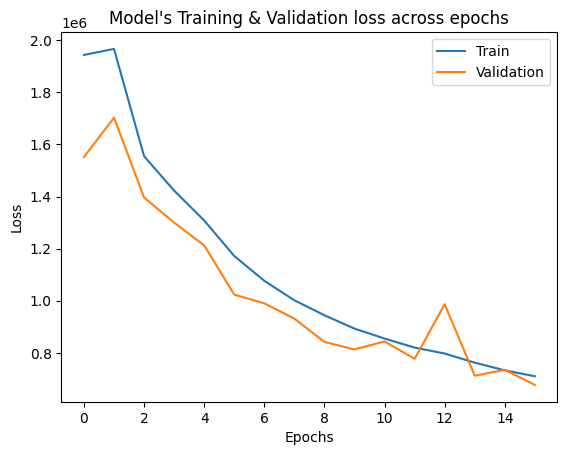

In [155]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Testing the Model Manually

In [172]:
Y_test

985837     6555
462798     3987
756833        0
83457      5912
250151        0
          ...  
86977     11268
315303     5149
150318     7586
943609     5606
966318        0
Name: Sales, Length: 101721, dtype: int64

In [175]:
# Lấy dự đoán từ model
predictions = model.predict(X_test)

# Tạo một bản sao của Y_test
df = Y_test.copy()

# Convert Y_test Series to DataFrame
df = pd.DataFrame({'Actual Sales': Y_test})

# Add the predicted values as a new column
df['Predicted Sales'] = predictions.flatten()

3179/3179 [==============================] - 7s 2ms/step


In [176]:
# Display the DataFrame
print(df)

        Actual Sales  Predicted Sales
985837          6555      5906.072754
462798          3987      4106.575195
756833             0         0.558736
83457           5912      6970.317871
250151             0         0.558736
...              ...              ...
86977          11268     12207.331055
315303          5149      4219.239258
150318          7586      8624.605469
943609          5606      5087.930664
966318             0         0.558736

[101721 rows x 2 columns]


In [178]:
# Calculate and print the MSE and MAE
mse = mean_squared_error(df['Actual Sales'], df['Predicted Sales'])
mae = mean_absolute_error(df['Actual Sales'], df['Predicted Sales'])
print("MSE:", mse)
print("MAE:", mae)

MSE: 670312.0540400393
MAE: 530.280434065432


In [156]:
# Lưu mô hình
model.save("model.h5")




In [3]:
from keras.models import load_model
# Tải mô hình đã lưu
model = load_model("model.h5")

In [5]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 150)               1950      
                                                                 
 dense_93 (Dense)            (None, 150)               22650     
                                                                 
 dense_94 (Dense)            (None, 150)               22650     
                                                                 
 dense_95 (Dense)            (None, 150)               22650     
                                                                 
 dense_96 (Dense)            (None, 150)               22650     
                                                                 
 dense_97 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,701
Trainable params: 92,701
Non-tra